# <font style="font-size:40px"><center><b>Machine Learning</b></center></font><font                        style="font-size:30px"><center><b>Master in Computational Finance (MCF) </b></center></font> 

<center> 

# 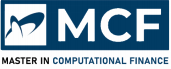

<center/>

# <font color='tomato' style="font-size:40px"><center><b>Homework 1</b></center></font></b></center></font> 

<center>
<b>profesor: </b> Nikola Vasiljevic

<b>students: </b> 
Aleksandar Milinkovic, Milos Milunovic, Nikola Krivacevic
</center>





## Installing and importing libraries:

In [111]:
# Installing additional libraries
!pip install yfinance
!pip install yahoofinancials
!pip install statsmodels=="0.17.0"
!pip install scipy=="1.7.1"

ERROR: Could not find a version that satisfies the requirement statsmodels==0.17.0 (from versions: 0.4.0, 0.4.1, 0.4.3, 0.5.0rc1, 0.5.0, 0.6.0rc1, 0.6.0rc2, 0.6.0, 0.6.1, 0.8.0rc1, 0.8.0, 0.9.0rc1, 0.9.0, 0.10.0rc2, 0.10.0, 0.10.1, 0.10.2, 0.11.0rc1, 0.11.0rc2, 0.11.0, 0.11.1, 0.12.0rc0, 0.12.0, 0.12.1, 0.12.2, 0.13.0rc0, 0.13.0)
ERROR: No matching distribution found for statsmodels==0.17.0


In [112]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
# Standard library
from typing import List

# Third-party libraries
import numpy as np 
import pandas as pd

import scipy
from scipy import stats
from scipy.stats import probplot
from scipy.stats import norm
from scipy.stats.mstats import winsorize

import yfinance as yf 
from yahoofinancials import YahooFinancials
from tabulate import tabulate 
from scipy.stats.mstats import winsorize

import seaborn as sns
import matplotlib. pyplot as plt 
import plotly.graph_objects as go

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews
from statsmodels.api import qqplot


# 2. FRED–MD: A Database for Macroeconomic Research

Consider the Federal Reserve Bank of St. Louis’ monthly database of macroeconomic
factors created by Michael W. McCracken et al. The data and the associated research paper
are provided on the shared drive. The list of all variables and the respective recommended
data transformations are listed in the appendix of the paper (pp. 586–588).
In this exercise, you will conduct an exploratory data analysis for a subset of the FRED–
MD database. You are strongly encouraged to use and possibly amend your EDA code
generated for the US stock market analysis in the previous exercise. You are free to choose
which types of data presentations and statistical testing are relevant for this particular data
set. You are most welcome to introduce your own ideas and add other tests and procedures.

In [139]:
df = pd.read_csv("McCracken_Macro_Dataset_Monthly.csv")
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,HWI,HWIURATIO,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,...,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,TWEXAFEGSMTHx,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAUCSL,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,2.0000,2.0,2.000000,5,5,2.0,2.0,5,5,5,5,5,5,5,5,5.0,5,5,5,5,5,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.0,5.0000,5.0000,5.0000,5.0000,6.0,6.0,6.0,6.0,6.00,6.0,6.00,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.000,6.000,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,01/01/1959,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0733,23.4027,22.2858,31.5688,18.6601,38.1454,8.1760,20.2407,12.2794,30.6469,20.9189,19.9060,34.7139,80.1973,1357.0,0.333579,67936,63868,6.0,16.3,1574,1169,1396,594,802,291078,52478,18796,713.0,2993,14998,8740,6258,33682,...,0.34,0.61,0.88,1.53,1.54,1.64,2.39,NaN,4.3122,359.8417,2.8065,0.9671,33.1,33.4,30.6,31.6,3.00,32.5,29.01,44.8,29.3,21.1,33.3,38.1,22.9,28.9,30.7,29.6,16.042,56.918,17.791,11.326,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,02/01/1959,2451.778,2301.5,17.452,294424.7425,18369.56308,22.5056,23.7185,22.4788,31.8004,18.7580,38.5100,8.2854,20.8817,12.8450,31.1834,21.3034,19.8518,34.2411,81.4428,1421.0,0.358386,67649,63684,5.9,15.5,1554,1164,1277,545,732,282958,52688,18890,704.2,2980,15115,8839,6276,33798,...,0.27,0.70,1.11,1.53,1.53,1.71,2.46,NaN,4.3133,359.8417,2.8093,0.9748,33.2,33.4,30.7,31.4,3.00,32.5,29.00,44.7,29.4,21.2,33.3,38.1,23.0,28.9,30.7,29.6,16.057,56.951,17.798,11.343,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,03/01/1959,2467.594,2318.5,17.617,293418.6704,18523.05762,22.8298,23.8621,22.5892,31.8004,19.1254,38.3277,8.3749,21.4240,13.3511,31.6519,21.6367,19.9873,35.1079,82.4769,1524.0,0.400947,68068,64267,5.6,15.3,1459,1093,1210,530,680,260346,53014,19069,704.1,3013,15259,8965,6294,33945,...,0.00,0.33,0.81,1.19,1.19,1.33,2.05,NaN,4.3228,359.8417,2.8127,0.9698,33.2,33.3,30.7,31.5,2.97,32.9,28.97,44.7,29.6,21.3,33.2,38.3,23.0,28.9,30.7,29.6,16.068,57.022,17.785,11.363,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,04/01/1959,2483.671,2334.9,17.553,299322.8039,18534.46600,23.3161,24.2067,22.9201,32.3021,19.2478,38.9658,8.5937,22.0157,13.7530,32.6322,22.0981,20.0685,34.9503,83.9922,1589.0,0.444973,68339,64768,5.2,14.9,1494,934,1039,408,631,246413,53321,19269,705.2,3085,15385,9077,6308,34052,...,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,NaN,4.3226,359.8417,2.8165,0.9636,33.2,33.4,30.7,31.7,2.97,32.7,28.98,44.8,29.7,21.3,33.2,38.3,23.1,29.0,30.7,29.6,16.100,57.080,17.796,11.403,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


## (a) Data selection: From each of the eight data categories presented in the paper select one representative variable.


In [140]:
selected_variables = [
  "RPI", # Group 1 - Output and income - Real Personal Income
  "HWI", # Group 2 - Labor market - Help-Wanted Index for United States
  "HOUST", # Group 3 - Housing - Housing Starts: Total New Privately Owned
  "DPCERA3M086SBEA", # Group 4 - Consumption, orders, and inventories - Real personal consumption expenditures
  "M2REAL", # Group 5 - Money and credit - Real M2 Money Stock
  "GS10", # Group 6 - Interest and exchange rates - 10-Year Treasury Rate
  "PPICMM", # Group 7 - Prices - PPI: Metals and metal products
  "S&P 500" # Group 8 - Stock market - S&P’s Common Stock Price Index: Composite
]

selected_df = df[selected_variables]
selected_df.head()

,RPI,HWI,HOUST,DPCERA3M086SBEA,M2REAL,GS10,PPICMM,S&P 500
0,5.000,2.0,4,5.000,5.0,2.00,6.0,5.00
1,2442.158,1357.0,1657,17.272,987.9,4.02,32.5,55.62
2,2451.778,1421.0,1667,17.452,992.1,3.96,32.5,54.77
3,2467.594,1524.0,1620,17.617,998.3,3.99,32.9,56.16
4,2483.671,1589.0,1590,17.553,1001.0,4.12,32.7,57.10


## (b) High-level overview: Present basic information about your data set in tabular or visual form.

In [141]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RPI              752 non-null    float64
 1   HWI              752 non-null    float64
 2   HOUST            753 non-null    int64  
 3   DPCERA3M086SBEA  752 non-null    float64
 4   M2REAL           753 non-null    float64
 5   GS10             753 non-null    float64
 6   PPICMM           753 non-null    float64
 7   S&P 500          753 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 47.2 KB


In [117]:
selected_df.describe()

,RPI,HWI,HOUST,DPCERA3M086SBEA,M2REAL,GS10,PPICMM,S&P 500
count,752.000000,752.000000,753.000000,752.000000,753.000000,753.000000,753.000000,753.000000
mean,8550.422294,3892.007979,1428.682603,60.538383,2763.485392,5.885046,120.194290,761.736428
std,4405.579583,1350.989514,391.505236,31.682304,1412.462501,2.933322,66.205218,872.661755
min,5.000000,2.000000,4.000000,5.000000,5.000000,0.620000,6.000000,5.000000
25%,4783.046750,3012.500000,1193.000000,32.314750,1834.600000,3.920000,70.000000,99.710000
50%,7717.568500,3833.500000,1455.000000,54.249500,2391.400000,5.570000,109.300000,338.460000
75%,12377.143750,4652.500000,1650.000000,92.374500,3372.100000,7.580000,166.100000,1225.920000
max,21267.506000,10934.000000,2494.000000,123.891000,7617.600000,15.320000,322.100000,4454.210000


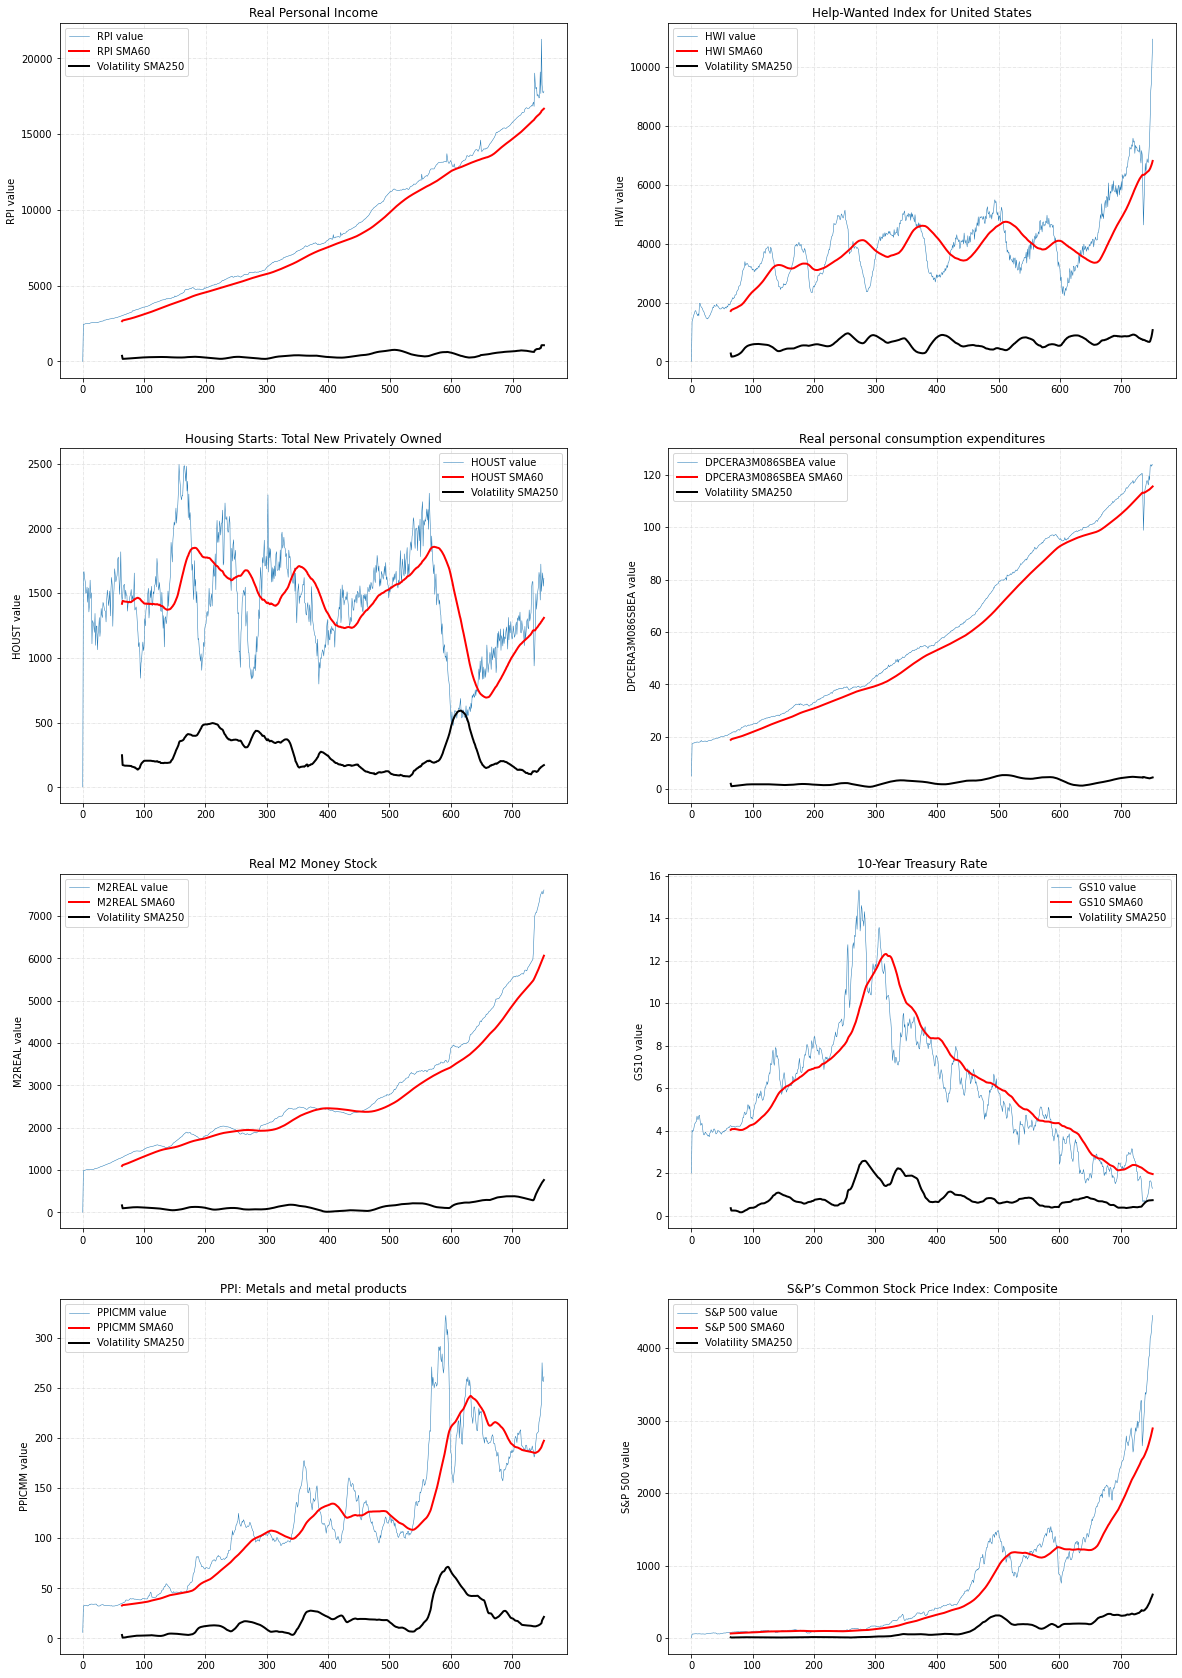

In [142]:
explanation = [
  "Real Personal Income", 
  "Help-Wanted Index for United States", 
  "Housing Starts: Total New Privately Owned", 
  "Real personal consumption expenditures", 
  "Real M2 Money Stock",
  "10-Year Treasury Rate", 
  "PPI: Metals and metal products", 
  "S&P’s Common Stock Price Index: Composite"
]

plt.figure(figsize=(20, 30))

for i, variable in enumerate(selected_variables):
    
    # Calculate rolling mean and standard deviation
    irollmean =  selected_df[variable].rolling(65).mean()
    irollvola =  selected_df[variable].rolling(65).std()

    # Create subplots
    plt.subplot(4, 2, i + 1)
    selected_df[variable].plot(linewidth=0.5)
    irollmean.plot(linewidth=2, color='red')
    irollvola.plot(linewidth=2, color='black')
    
    # Labels and graphics
    plt.xlabel(None)
    plt.ylabel(variable + ' value')
    plt.title(explanation[i])
    plt.legend([variable + ' value', variable + ' SMA60','Volatility SMA250'])
    plt.grid(color='lightgray', linestyle='-.', linewidth=0.5)

## (c) Data transformations: Apply data transformations and run some stationarity tests.

In [143]:
def data_transforms(series, transform):
  """
  Transforms a single series according to its transformation code
  Inputs:
  1) series: pandas series to be transformed
  2) transfom: transform code for the series
  Returns:
  transformed series
  """
  if transform == 1:
      # level
      return series
  elif transform == 2:
      # 1st difference
      return series.diff()
  elif transform == 3:
      # second difference
      return series.diff().diff()
  elif transform == 4:
      # Natural log
      return np.log(series)
  elif transform == 5:
      # log 1st difference
      return np.log(series).diff()
  elif transform == 6:
      # log second difference
      return np.log(series).diff().diff()
  elif transform == 7:
      # First difference of percent change
      return series.pct_change().diff()
  else:
      raise ValueError("Transform must be in [1, 2, ..., 7]")


transformed_df = pd.DataFrame({key: data_transforms(selected_df[key], value) for (key, value) in zip(selected_variables,  selected_df.iloc[0])})

transformed_df.drop(transformed_df.index[[0, 1]], inplace=True)

transformed_df.head()

,RPI,HWI,HOUST,DPCERA3M086SBEA,M2REAL,GS10,PPICMM,S&P 500
2,0.003931,64.0,7.418781,0.010368,0.004242,-0.06,-1.689481,-0.015400
3,0.006430,103.0,7.390181,0.009410,0.006230,0.03,0.012233,0.025062
4,0.006494,65.0,7.371489,-0.003639,0.002701,0.13,-0.018330,0.016599
5,0.005763,66.0,7.311886,0.012005,0.005181,0.19,0.012195,0.014949
6,0.003102,62.0,7.315218,0.003708,0.004066,0.03,-0.003063,-0.008664


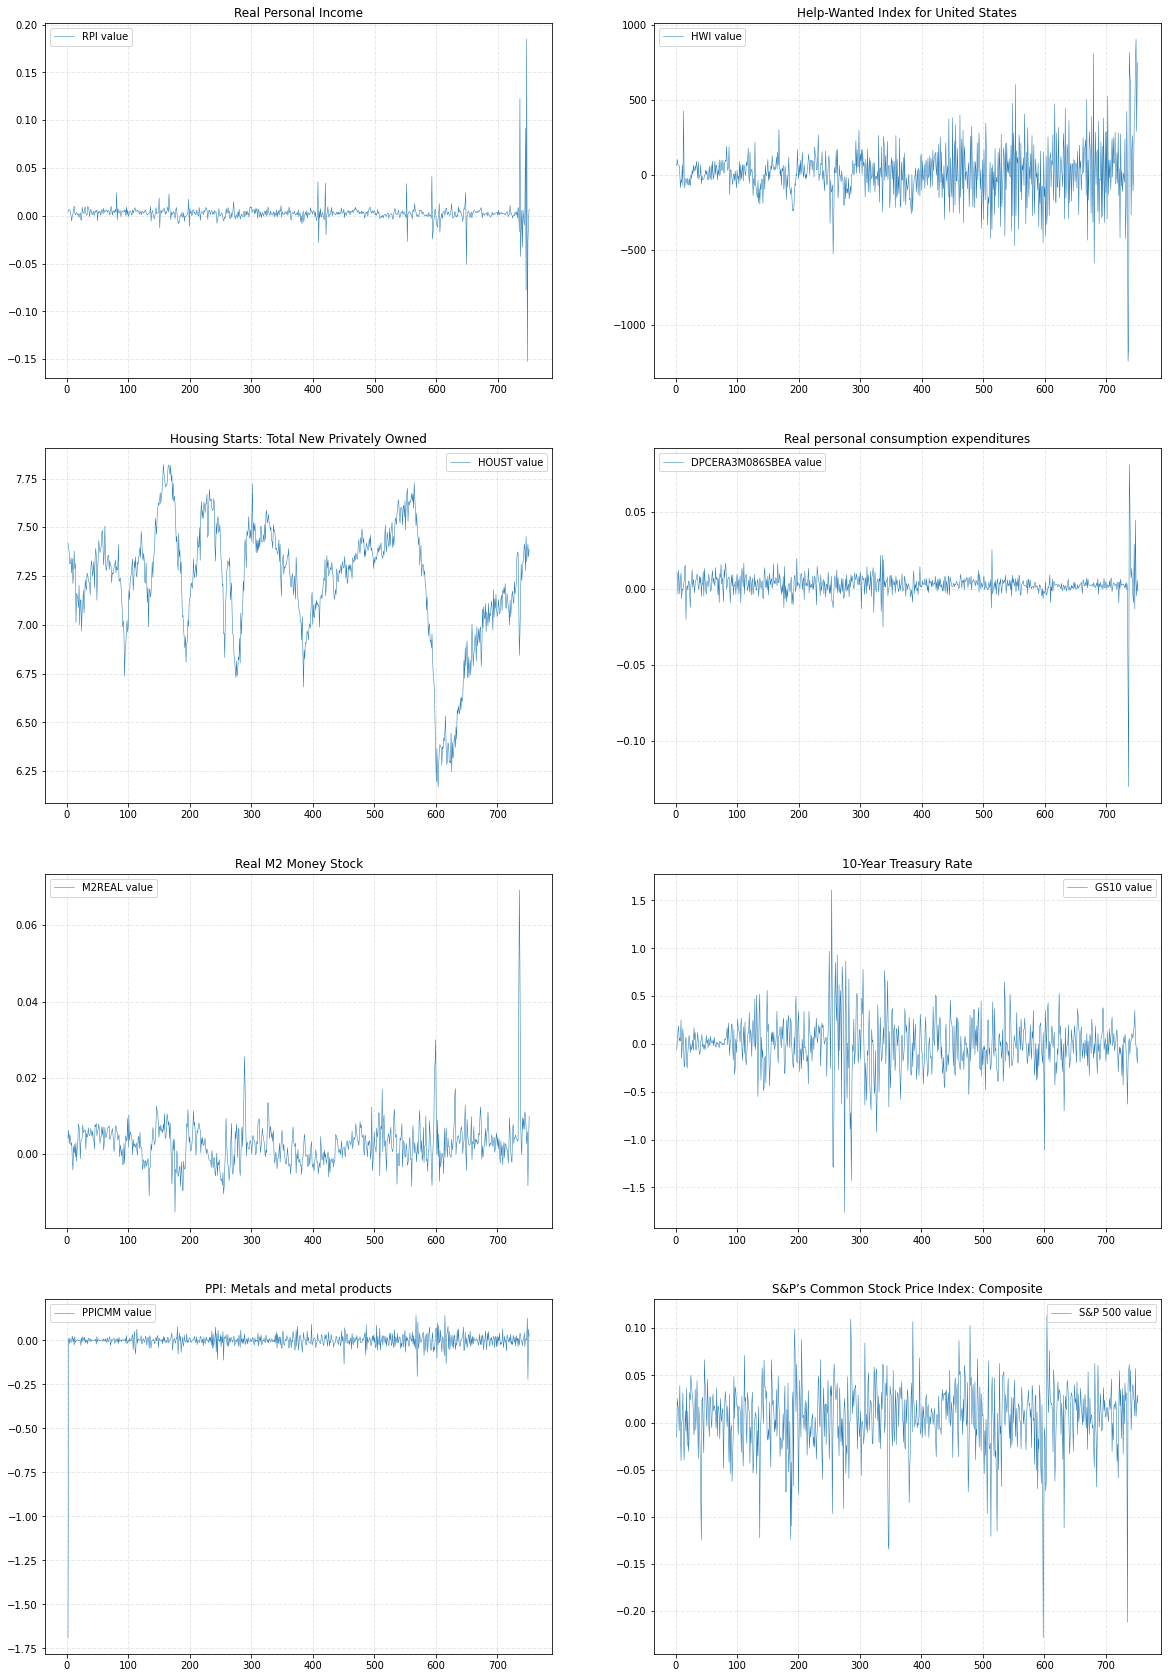

In [120]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(selected_variables):
    # Create subplots
    plt.subplot(4, 2, i + 1)
    transformed_df[variable].plot(linewidth=0.5)
    
    # Labels and graphics
    plt.title(explanation[i])
    plt.legend([variable + ' value'])
    plt.grid(color='lightgray', linestyle='-.', linewidth=0.5)

In [190]:
def kpss_test(timeseries, only_p_value=False):
    
    kpsstest = kpss(timeseries, regression="c", nlags="legacy")

    if only_p_value:
      return kpsstest[1]

    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print("Results of KPSS Test:")
    print(kpss_output)

print("Non-stationary variables (p-value < 0.05 on KPSS test):")

for variable in selected_variables:
  p_value = kpss_test(transformed_df[variable].dropna(), only_p_value=True)
  if p_value < 0.05:
    print(variable)
    kpss_test(transformed_df[variable].dropna())


Non-stationary variables (p-value < 0.05 on KPSS test):
RPI
Results of KPSS Test:
Test Statistic            0.493821
p-value                   0.043058
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
HOUST
Results of KPSS Test:
Test Statistic            0.630855
p-value                   0.019831
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
DPCERA3M086SBEA
Results of KPSS Test:
Test Statistic            0.501627
p-value                   0.041300
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


## (d) Missing observations: Impute missing values using your preferred approach. If there are no missing values in your data set, randomly remove some observations just for this part of the exercise. Justify your choice(s).

In [122]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 2 to 752
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RPI              750 non-null    float64
 1   HWI              750 non-null    float64
 2   HOUST            751 non-null    float64
 3   DPCERA3M086SBEA  750 non-null    float64
 4   M2REAL           751 non-null    float64
 5   GS10             751 non-null    float64
 6   PPICMM           751 non-null    float64
 7   S&P 500          751 non-null    float64
dtypes: float64(8)
memory usage: 52.8 KB


As we can see from the plot above, there are only few missing values. Given the amount and nature of our data this shouldn't be a big problem and we can just use simple method of just removing them. 

In [123]:
transformed_df = transformed_df.dropna()
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 2 to 751
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RPI              750 non-null    float64
 1   HWI              750 non-null    float64
 2   HOUST            750 non-null    float64
 3   DPCERA3M086SBEA  750 non-null    float64
 4   M2REAL           750 non-null    float64
 5   GS10             750 non-null    float64
 6   PPICMM           750 non-null    float64
 7   S&P 500          750 non-null    float64
dtypes: float64(8)
memory usage: 52.7 KB


## (e) Outliers: Implement at least one approach for detection of outliers. Justify your choices (even if you do not remove any outliers).

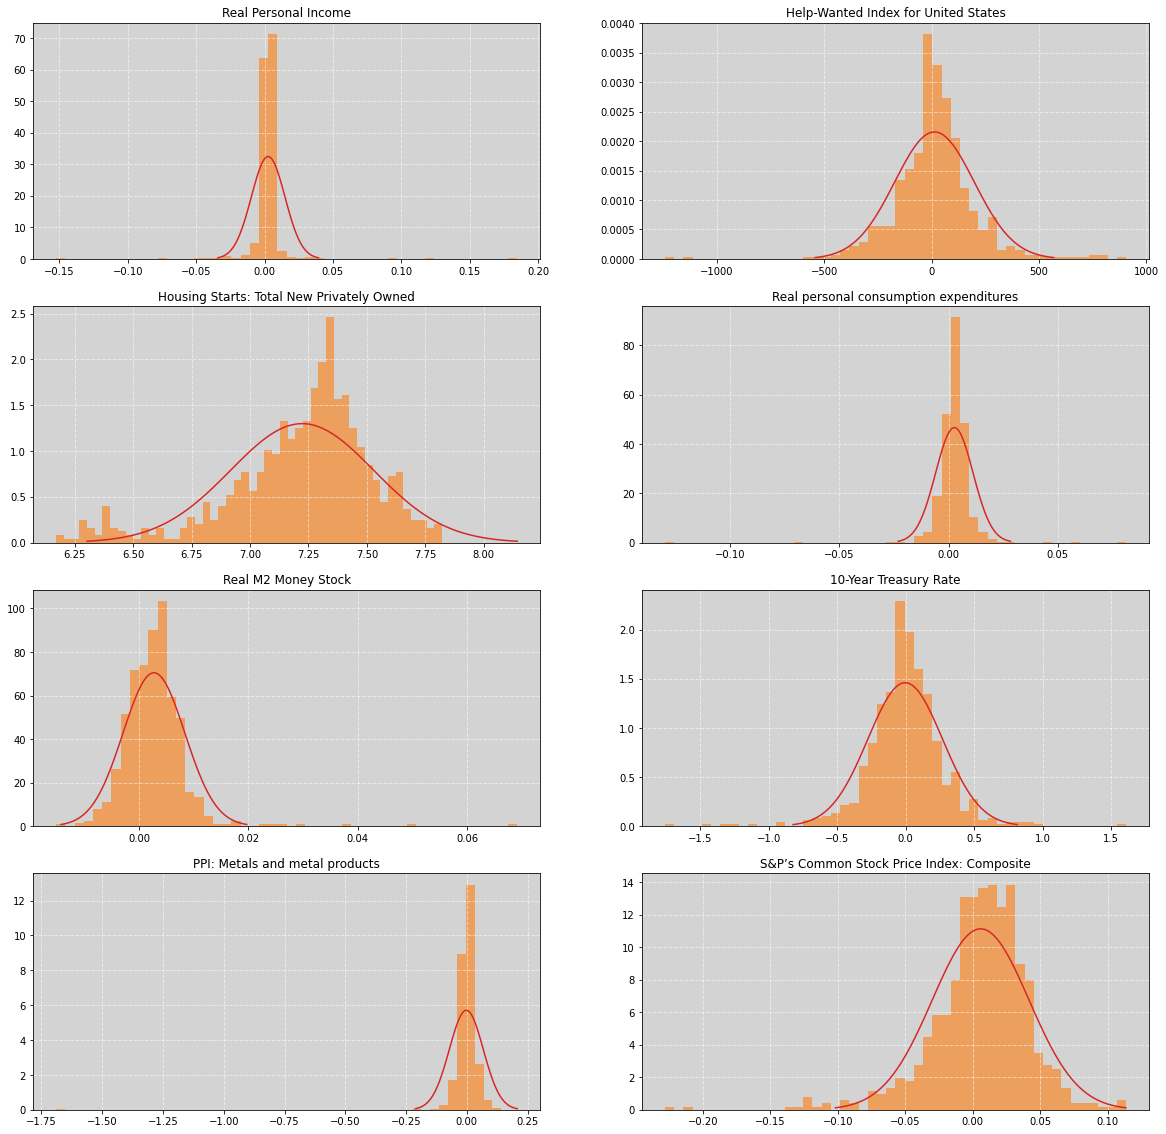

In [144]:
plt.figure(figsize=(20, 20))

for i in range(len(selected_variables)):
  # Prepare inputs for normal distribution plot overlay
  mean_val  = transformed_df[selected_variables[i]].mean()
  std_val   = transformed_df[selected_variables[i]].std()
  min_val   = transformed_df[selected_variables[i]].min()
  max_val   = transformed_df[selected_variables[i]].max()
  x_norm    = np.linspace(mean_val-3*std_val, mean_val+3*std_val, 100)  

  y_norm  = scipy.stats.norm.pdf(x_norm,mean_val,std_val)
  
  # Create subplots
  plt.subplot(4, 2, i+1)    
  transformed_df[selected_variables[i]].hist(bins=50, alpha=0.6, density=True, color='tab:orange')
  plt.plot(x_norm, y_norm, color='tab:red', linewidth=1.5)
  
  # Labels and graphics
  plt.title(explanation[i])
  plt.grid(color='white', linestyle='-.', linewidth=0.5)
  ax = plt.gca()
  ax.set_facecolor('lightgrey')

Just by visual inspecition and looking how plots are positioned, if they are centered or not we can tell a lot. E.g. we can clearly see that Housing is skewed to the left (negatively skewed). Counter example would be S&P 500 which are leaning to the right (positively skewed). And another example is Help-Wanted index which look centered, but we can also notice that it has the fat tail - exibiting leptokutic behavior which we'll look into once we calculate kurtosis for the returns.

Similar what we saw from the return distibution histograms, we can formaly calculate the skewness and kurtosis and see now numerically what we explained previously.

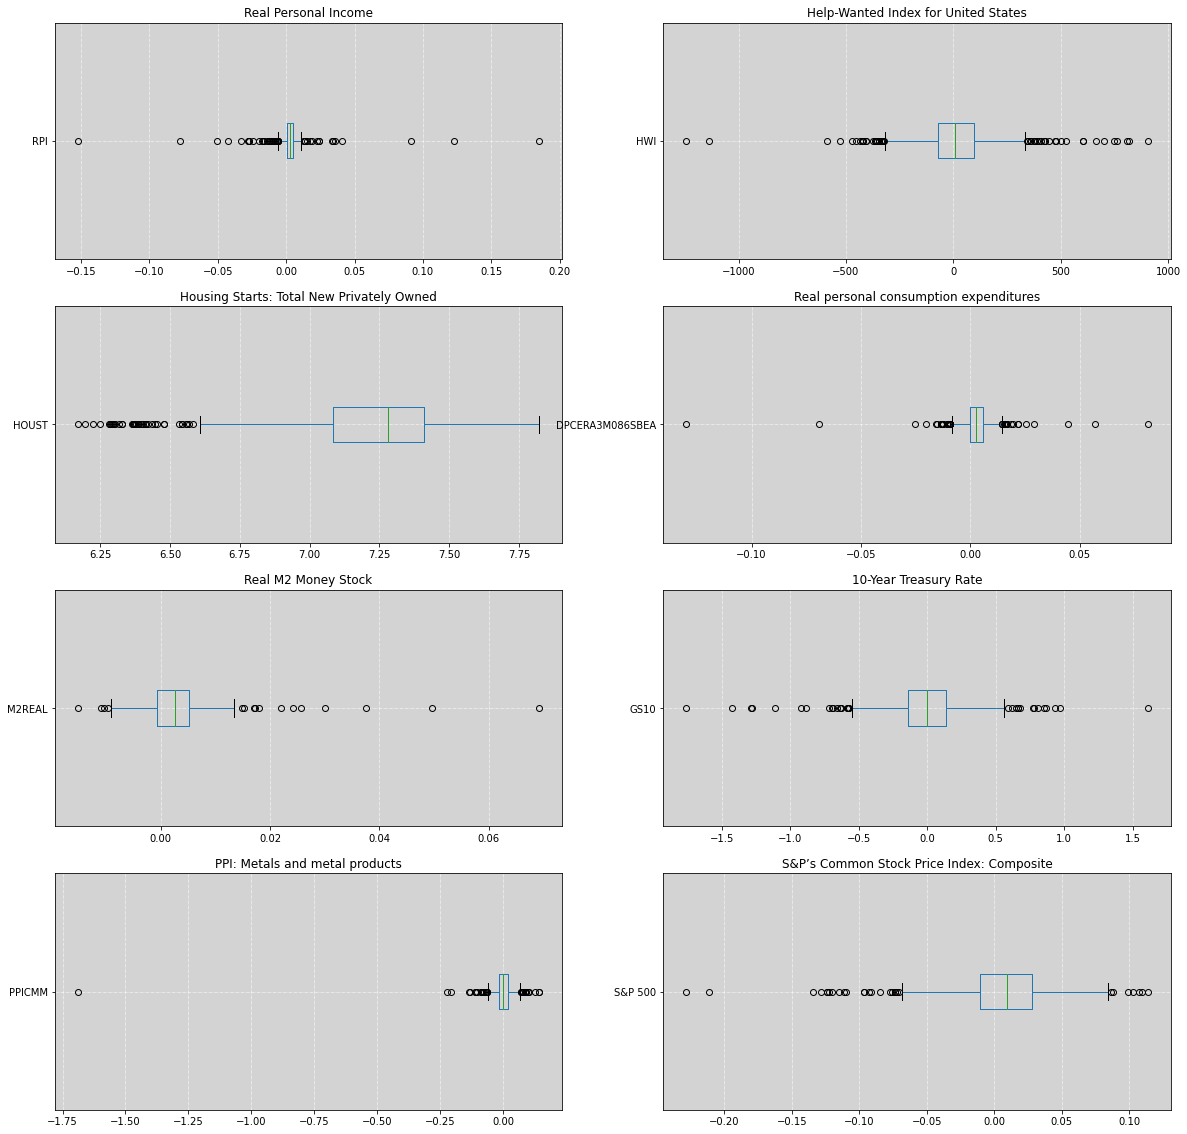

In [145]:
plt.figure(figsize=(20, 20))

for i in range(len(selected_variables)):
  # Create subplots
  plt.subplot(4, 2, i+1)
  transformed_df[selected_variables[i]].plot.box(vert=False)
  # Labels and graphics
  plt.title(explanation[i])
  plt.grid(color='white', linestyle='-.', linewidth=0.5)
  ax = plt.gca()
  ax.set_facecolor('lightgrey')

In [146]:
# Compute skewness and kurtosis
print('Skewness:')
print(transformed_df.skew())
print('-'*100)
print('Kurtosis:')
print(transformed_df.kurt())
print('-'*100)

Skewness:
RPI                 2.879811
HWI                -0.113034
HOUST              -1.029107
DPCERA3M086SBEA    -4.238843
M2REAL              3.493763
GS10               -0.444092
PPICMM            -18.844695
S&P 500            -1.241635
dtype: float64
----------------------------------------------------------------------------------------------------
Kurtosis:
RPI                116.132959
HWI                  7.012723
HOUST                1.322071
DPCERA3M086SBEA     94.658975
M2REAL              33.654889
GS10                 6.488771
PPICMM             453.791290
S&P 500              5.296398
dtype: float64
----------------------------------------------------------------------------------------------------


### Clipping


In [178]:
clipped_variables = transformed_df.copy()
clip_variables = transformed_df.clip(lower=transformed_df.quantile(0.009), upper=transformed_df.quantile(0.991), axis=1)
clipped_variables.iloc[:] = clip_variables 
display(clipped_variables)

,RPI,HWI,HOUST,DPCERA3M086SBEA,M2REAL,GS10,PPICMM,S&P 500
2,0.003931,64.00,7.418781,0.010368,0.004242,-0.06,-0.104447,-0.015400
3,0.006430,103.00,7.390181,0.009410,0.006230,0.03,0.012233,0.025062
4,0.006494,65.00,7.371489,-0.003639,0.002701,0.13,-0.018330,0.016599
5,0.005763,66.00,7.311886,0.012005,0.005181,0.19,0.012195,0.014949
6,0.003102,62.00,7.315218,0.003708,0.004066,0.03,-0.003063,-0.008664
...,...,...,...,...,...,...,...,...
748,-0.026877,620.54,7.322510,0.004273,0.002775,0.03,0.001391,0.057313
749,-0.026821,290.00,7.374002,-0.004792,0.005910,-0.02,0.087336,0.006420
750,-0.003488,620.54,7.412764,0.005309,-0.008260,-0.10,-0.104447,0.016807
751,0.006882,620.54,7.348588,-0.001446,0.002443,-0.20,0.063045,0.029116


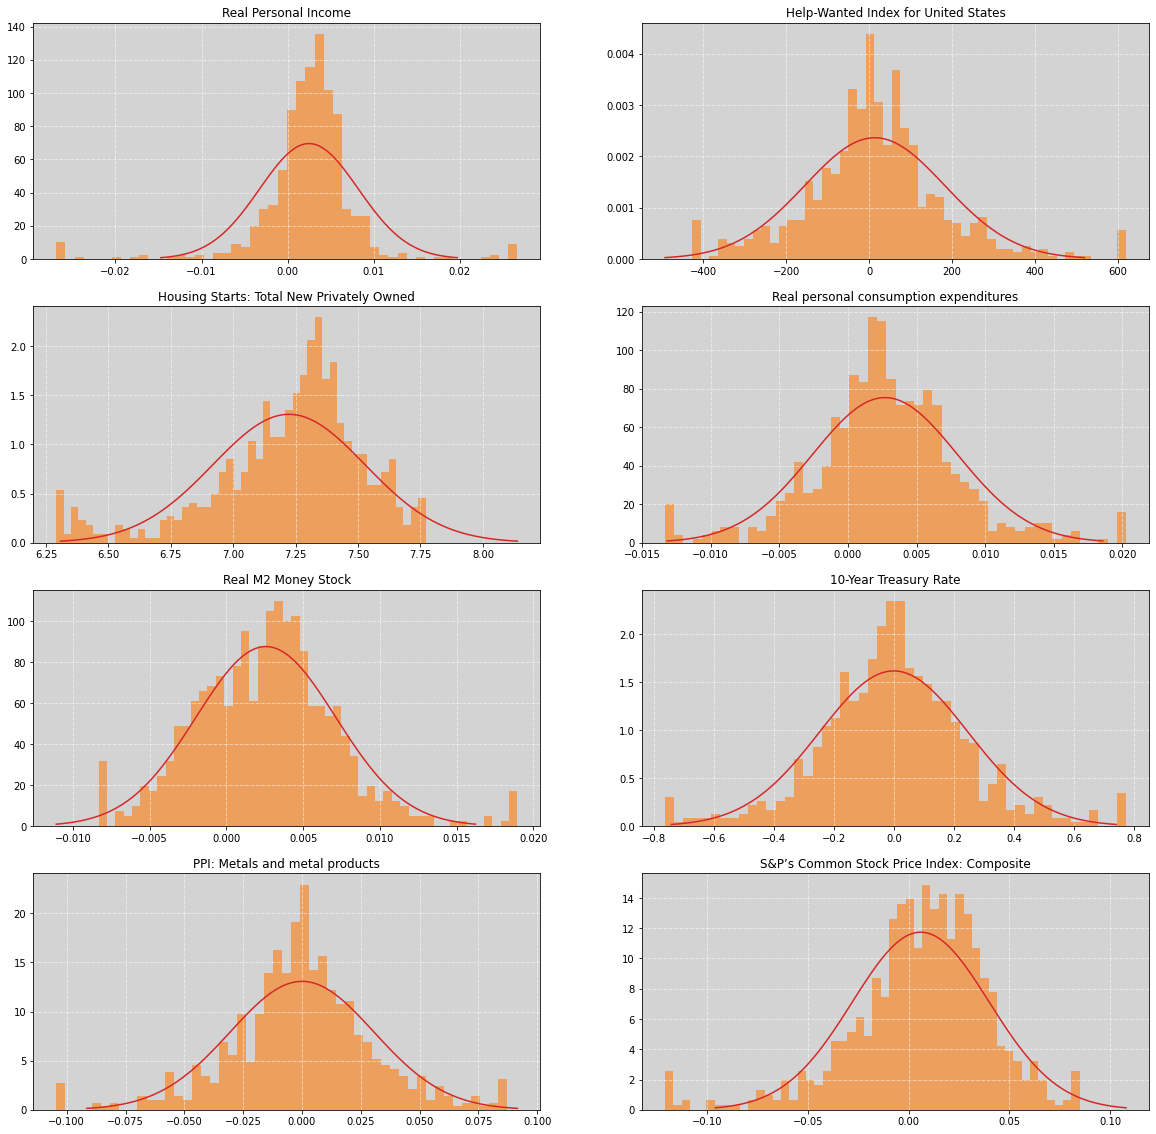

In [179]:
plt.figure(figsize=(20, 20))

for i in range(len(selected_variables)):
  # Prepare inputs for normal distribution plot overlay
  mean_val  = clipped_variables[selected_variables[i]].mean()
  std_val   = clipped_variables[selected_variables[i]].std()
  min_val   = clipped_variables[selected_variables[i]].min()
  max_val   = clipped_variables[selected_variables[i]].max()
  x_norm    = np.linspace(mean_val-3*std_val, mean_val+3*std_val, 100)  

  y_norm  = scipy.stats.norm.pdf(x_norm,mean_val,std_val)
  
  # Create subplots
  plt.subplot(4, 2, i+1)    
  clipped_variables[selected_variables[i]].hist(bins=50, alpha=0.6, density=True, color='tab:orange')
  plt.plot(x_norm, y_norm, color='tab:red', linewidth=1.5)
  
  # Labels and graphics
  plt.title(explanation[i])
  plt.grid(color='white', linestyle='-.', linewidth=0.5)
  ax = plt.gca()
  ax.set_facecolor('lightgrey')

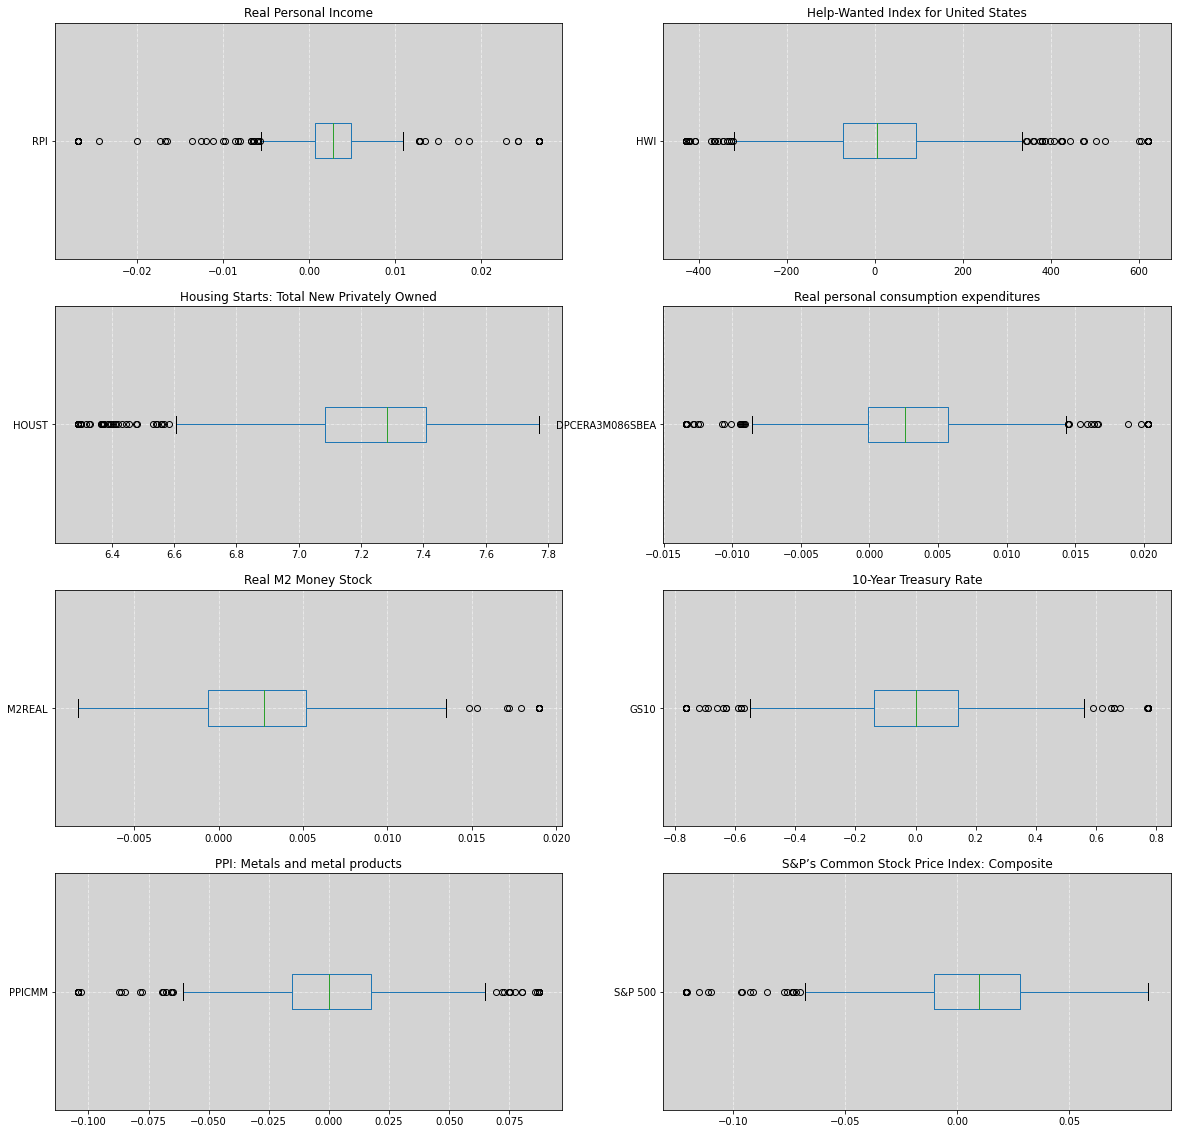

In [180]:
plt.figure(figsize=(20, 20))

for i in range(len(selected_variables)):
  # Create subplots
  plt.subplot(4, 2, i+1)
  clipped_variables[selected_variables[i]].plot.box(vert=False)
  # Labels and graphics
  plt.title(explanation[i])
  plt.grid(color='white', linestyle='-.', linewidth=0.5)
  ax = plt.gca()
  ax.set_facecolor('lightgrey')

## (f) Normality and scaling: Explore (i.e., visually and formally by using statistical tools) if the data are normally distributed, and suggest a procedure for scaling the time series.

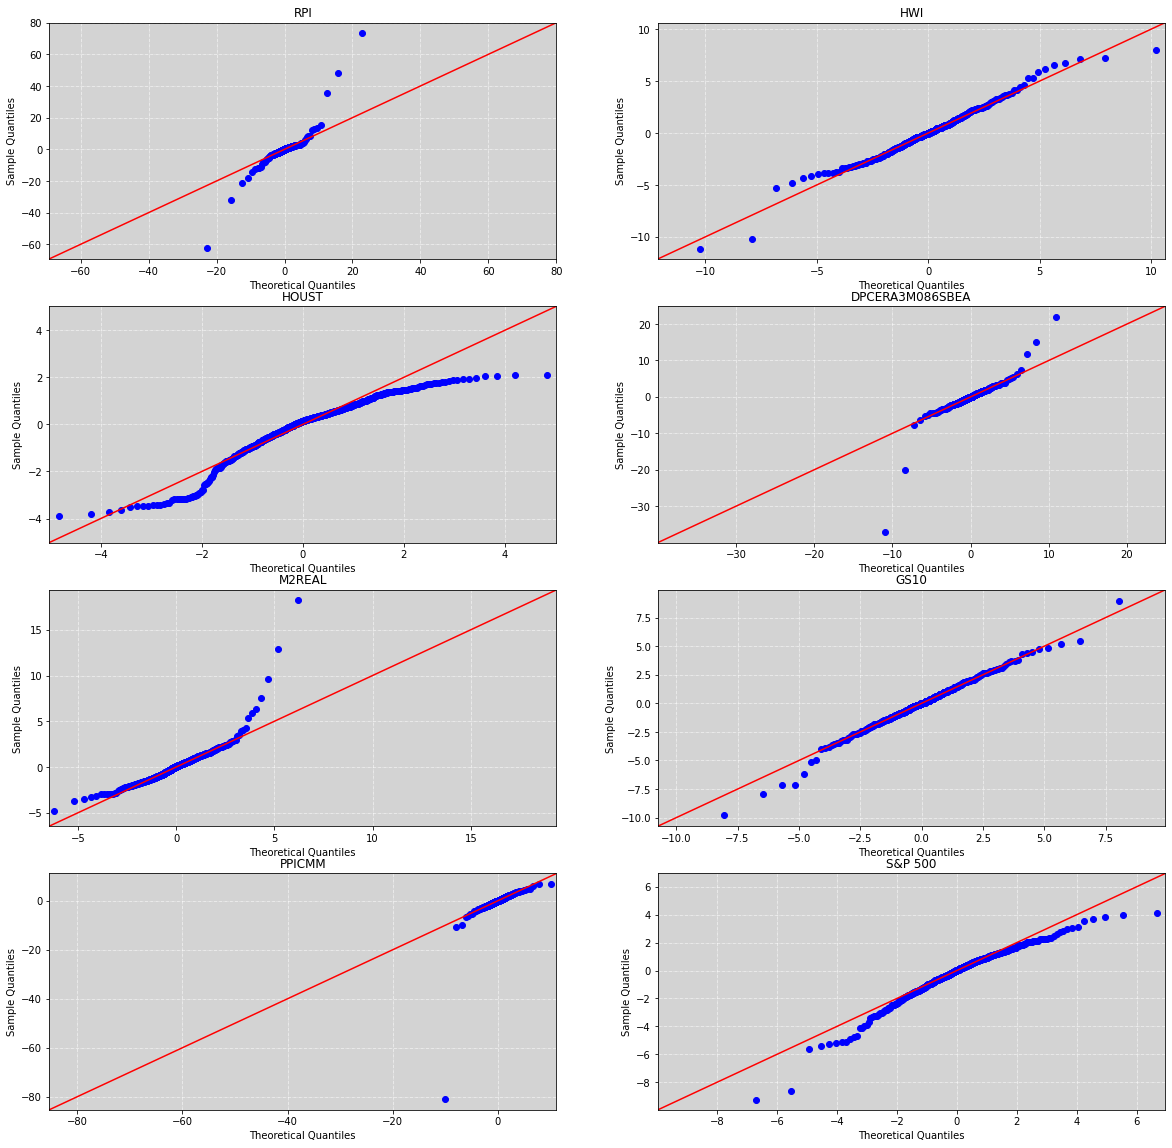

In [181]:
plt.figure(figsize=(20, 20))

for i, variable in enumerate(selected_variables):
    # Create subplots
    subplot = plt.subplot(4, 2, i + 1)
    qqplot(transformed_df[variable].dropna(), stats.t, fit=True, line="45", ax=subplot)

    # Labels and graphics
    plt.title(variable)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

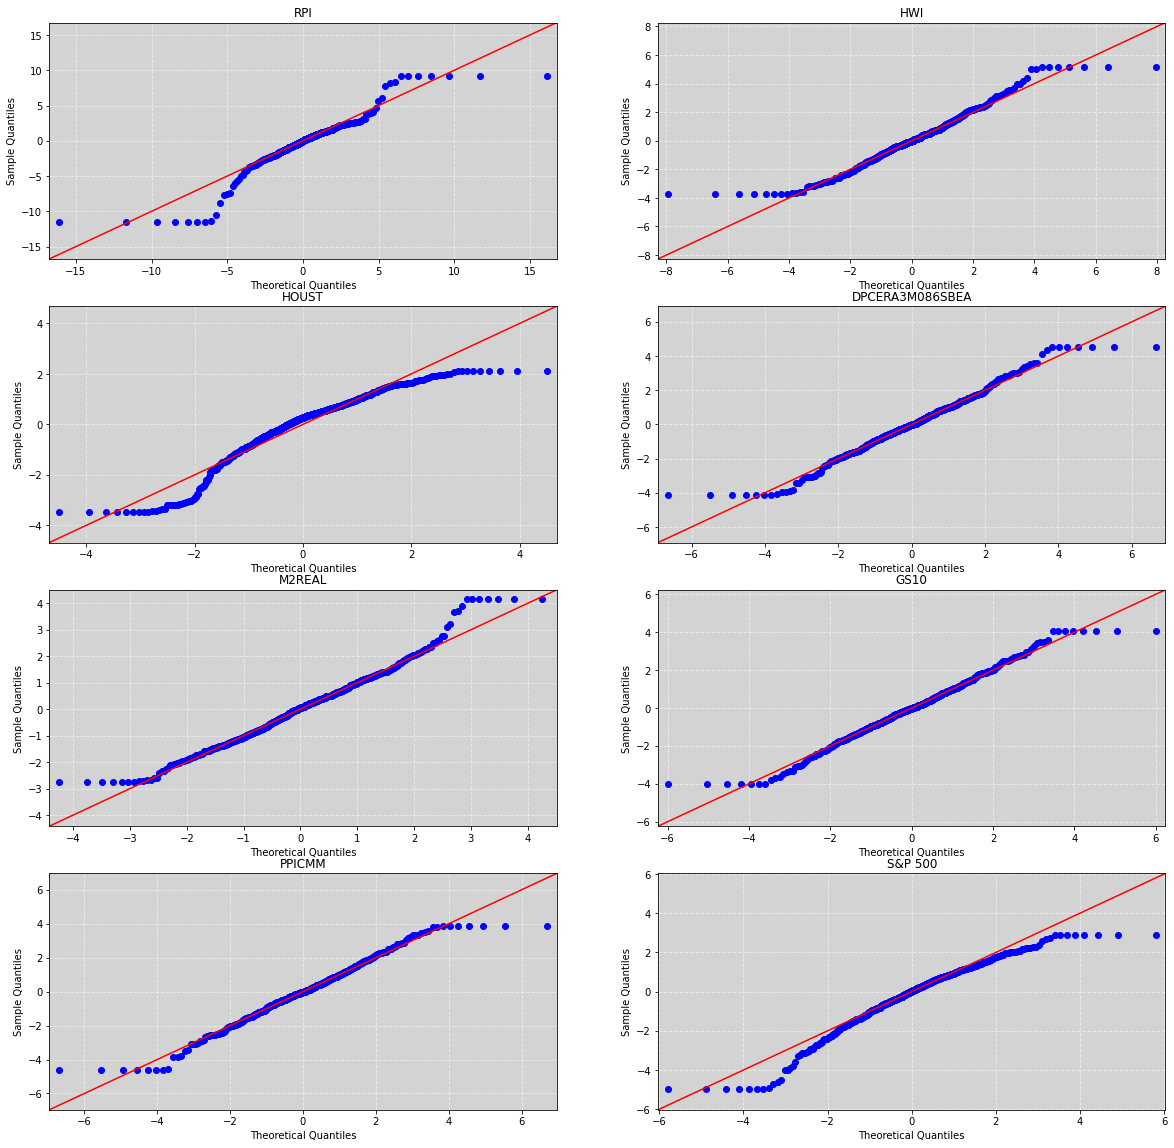

In [182]:
plt.figure(figsize=(20, 20))

for i, variable in enumerate(selected_variables):
    # Create subplots
    subplot = plt.subplot(4, 2, i + 1)
    qqplot(clip_variables[variable].dropna(), stats.t, fit=True, line="45", ax=subplot)

    # Labels and graphics
    plt.title(variable)
    plt.grid(color='white', linestyle='-.', linewidth=0.5)
    ax = plt.gca()
    ax.set_facecolor('lightgrey')

In [186]:
normal_returns = 0
for variable in selected_variables:
  jarque_bera_test = stats.jarque_bera(clipped_variables[variable].dropna())
  if jarque_bera_test[0] > 0.05:
    print(variable)
    print(f"p-value {jarque_bera_test[0]}")
    print("-"*10)

RPI
p-value 3504.026098023938
----------
HWI
p-value 116.84702319643529
----------
HOUST
p-value 173.3552793520039
----------
DPCERA3M086SBEA
p-value 81.49081375640506
----------
M2REAL
p-value 61.71945876780939
----------
GS10
p-value 51.312164569711584
----------
PPICMM
p-value 71.8512954229487
----------
S&P 500
p-value 209.88421184128435
----------


In [187]:
from sklearn.preprocessing import StandardScaler

scaled_variables = clipped_variables.copy()
scaled_variables[selected_variables] = StandardScaler().fit_transform(clipped_variables[selected_variables])
scaled_variables.head()

,RPI,HWI,HOUST,DPCERA3M086SBEA,M2REAL,GS10,PPICMM,S&P 500
2,0.254549,0.297451,0.641708,1.450095,0.367217,-0.238828,-3.426382,-0.629691
3,0.690505,0.528691,0.547893,1.268999,0.803836,0.125971,0.400307,0.561537
4,0.701673,0.303381,0.486577,-1.199199,0.028578,0.531304,-0.602047,0.312389
5,0.574133,0.309310,0.291059,1.759868,0.573484,0.774503,0.399081,0.263802
6,0.109918,0.285593,0.301989,0.190558,0.328558,0.125971,-0.101325,-0.431375


In [188]:
scaled_variables.describe()

,RPI,HWI,HOUST,DPCERA3M086SBEA,M2REAL,GS10,PPICMM,S&P 500
count,7.500000e+02,7.500000e+02,7.510000e+02,7.500000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02
mean,-1.230127e-16,8.881784e-17,8.759083e-16,-9.917992e-18,-2.542721e-17,1.182661e-17,2.853170e-17,1.330494e-18
std,1.000667e+00,1.000667e+00,1.000666e+00,1.000667e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00
min,-5.120737e+00,-2.617289e+00,-3.057437e+00,-3.031915e+00,-2.396314e+00,-3.086287e+00,-3.426382e+00,-3.738244e+00
25%,-3.196319e-01,-5.074388e-01,-4.557402e-01,-5.234846e-01,-6.999875e-01,-5.630934e-01,-5.005415e-01,-4.860817e-01
50%,5.894808e-02,-4.347811e-02,1.955191e-01,-1.838011e-02,2.599865e-02,4.371760e-03,-1.182574e-03,1.032857e-01
75%,4.131286e-01,4.753278e-01,6.070897e-01,5.729874e-01,5.699585e-01,5.718370e-01,5.672905e-01,6.506003e-01
max,4.223541e+00,3.597294e+00,1.795925e+00,3.323516e+00,3.602300e+00,3.135564e+00,2.863433e+00,2.324269e+00


## (g) Multivariate analysis: Compute and visualize (e.g., using a heatmap) the correlation matrix and discuss the results (e.g., pick some examples and provide a rationale why those correlation coefficients make or do not make sense).

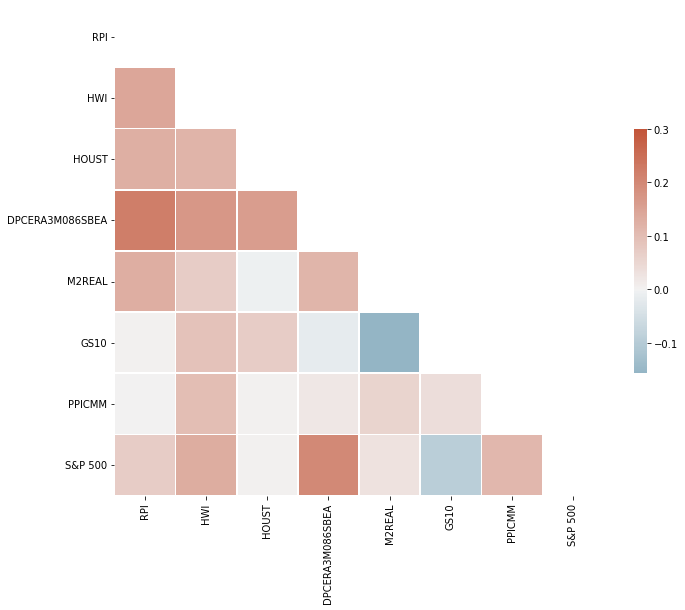

In [189]:
corr = scaled_variables.dropna().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})